##  <font color='darkest Alice'>  1.  FIRST ANALYSIS : UNDERSTANDING THE DATA </font>
 

#### <font color='#3b5998'> 1.1 Finding out in which year has the most number of films </font>
#### <font color='#3b5998'> 1.2 Visualizing IMDb over the years </font>
#### <font color='#3b5998'> 1.3 Analysing the gross trend over the years  </font>
#### <font color='#3b5998'> 1.4 REVENUE PLOT </font>
#### <font color='#3b5998'> 1.5  3-d plot for IMDB vs Budget vs Gross</font>
####  <font color='#3b5998'> 1.6 Q. Is budget directly related to profit? </font>
#### <font color='#3b5998'> 1.7  WITH WHICH FACTOS IS PROFIT ACTUALLY RELATED IN THE DATASET? </font>
#### <font color='#3b5998'> 1.8 For the year range 2000-2020 we will find out what was their gross and budget </font> 
#### <font color='#3b5998'>1.9 Which country has the highest number of movies? </font>
####  <font color='#3b5998'> 1.10 Which language has the highest number of movies ? </font>

In [1]:
#importing required libraries

In [2]:
import os                            #importng os library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
%matplotlib inline

In [3]:

path=os.chdir("..")                   #Moving back one folder


In [4]:
path=os.getcwd()                          #Checking the path
path

'C:\\DataAnalysis4Python\\kanakia_dhruv_spring2017\\Final'

In [5]:
final_path= path+"\\Data\\movie_metadata.csv" #setting up the final path in final_path

In [35]:
df= pd.read_csv(final_path)
#df.head()

In [36]:
df1=df.dropna()                         #dropping all the NA values
#df1.head()

## <font color='#3b5998'> 1. Finding out in which year range the number of films in the dataset is the most </font>

In [37]:
df_year=df1.groupby('title_year')['movie_title'].count()  #grouping by title_year to count year of movies in each year

In [38]:
df_year_count= df_year.to_frame().reset_index()

In [39]:
#df_year_count.head()

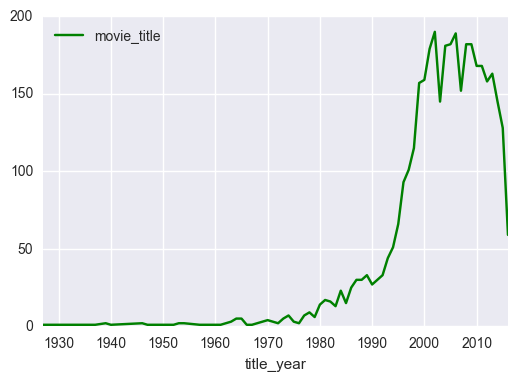

In [40]:
df_year_count.plot(x='title_year',y='movie_title',kind='line', color='green')

## <font color='#ff8080'>CONCLUSION:The dataset has the highest number of films between the year 2000-2010  </font> 

### <font color='#3b5998'> 1.2 Visualizing IMDb over the years. </font>


In [41]:
df_imdb_year=df1.groupby('title_year' ,as_index=False)['imdb_score'].mean()

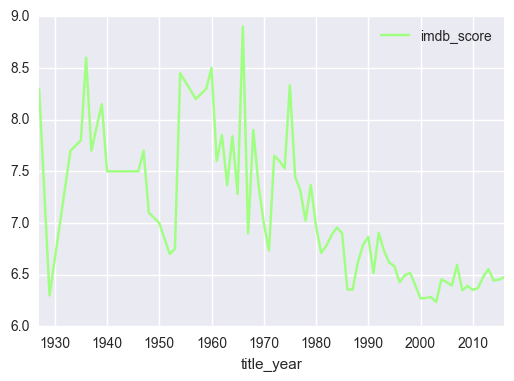

In [42]:
df_imdb_year.plot(x='title_year', y='imdb_score', kind='line', color='#9fff80')

##  <font color='#ff8080'> It has no direct pattern but we can surely see that increase in number of films has decreased the quality and can that with increase in Quantity, Quality has decreased </font> 


## <font color='#3b5998'> 1.3 Visualizing the trend of GROSS over the YEAR's </font> 

In [43]:
df_movies_year_gross = df1.groupby(['title_year'], as_index=False)['gross'].sum()
#df_movies_year_gross.head()

In [44]:
df_year_count= df_year_count.merge(df_movies_year_gross)

In [45]:
#df_year_count.head()

In [46]:
df_year_count[['title_year','gross']] = df_year_count[['title_year','gross']].apply(pd.to_numeric)

In [47]:
# df_year_count.head()

In [48]:
df_year_count['Average']= df_year_count['gross']/df_year_count['movie_title'] 

In [49]:
df_year_count= df_year_count[(df_year_count.title_year> 1980)]

In [50]:
# df_year_count.head()

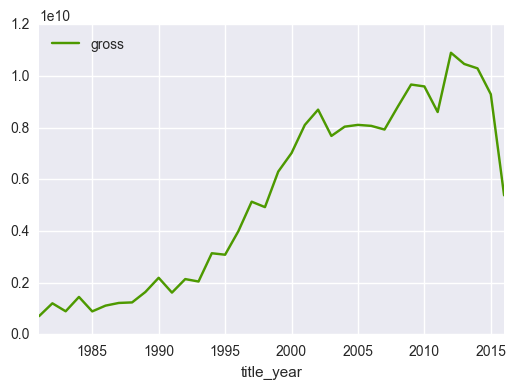

In [51]:
df_year_count.plot(x='title_year', y='gross', kind='line', color='#4d9900' )

## <font color='#ff8080'> Gross increased over the years but is declining in the current years  </font> 

### <font color='#3b5998'>1.4 REVENUE PLOT </font>

In [59]:
df_movies_year_budget = df1.groupby(['title_year'], as_index=False)['budget'].sum()
# df_movies_year_budget.head()


In [60]:
df_year_count_budget= df_year_count.merge(df_movies_year_budget)

In [63]:
df_year_count_budget.head()

title_year  movie_title         gross       Average       budget
0      1981.0           17  7.048333e+08  4.146078e+07  182150000.0
1      1982.0           16  1.200601e+09  7.503755e+07  251400000.0
2      1983.0           13  8.922934e+08  6.863795e+07  255000000.0
3      1984.0           23  1.447611e+09  6.293960e+07  354300000.0
4      1985.0           15  8.883470e+08  5.922313e+07  246605523.0

In [61]:
df_year_count_budget[['title_year','budget']] = df_year_count_budget[['title_year','budget']].apply(pd.to_numeric)

In [64]:
df_year_count_budget['Average_Budget']= df_year_count_budget['budget']/df_year_count['movie_title'] 

In [65]:
df_year_count_budget= df_year_count_budget[(df_year_count_budget.title_year> 1980)]

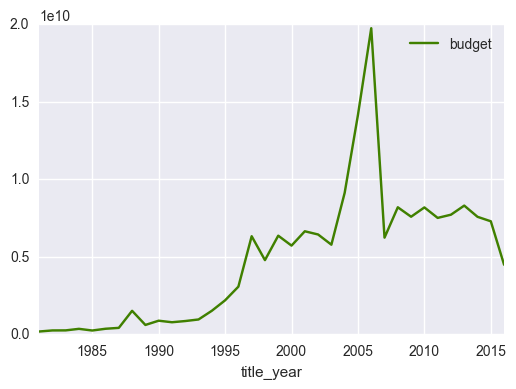

In [70]:
df_year_count_budget.plot(x='title_year', y='budget', kind='line', color='#408000')

## <font color='#ff8080'> Can see there is a pattern between the three plots i.e IMDB_Score vs Budget vs Gross pver the years. To get a better idea we will plot a 3-d interactive plot  </font> 


### <font color='#3b5998'> 1.5  3-d plot for IMDB vs Budget vs Gross</font>

In [75]:
%matplotlib notebook

In [76]:
%matplotlib notebook

<IPython.core.display.Javascript object>


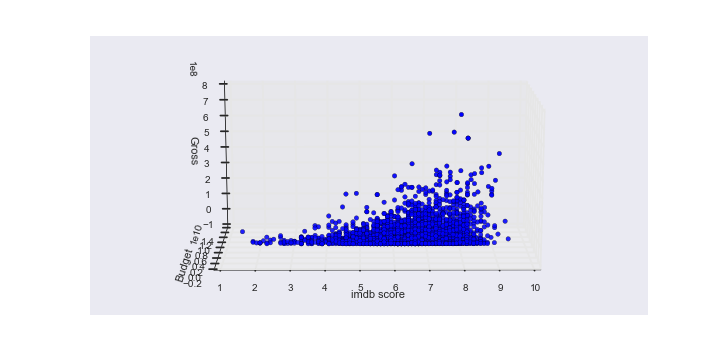

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(10,5)).gca(projection='3d')
#ax = fig.add_subplot(111, projection='3d')
x =df1['imdb_score']
y =df1['budget']
z =df1['gross']



fig.scatter(x, y, z)

fig.set_xlabel('imdb score')
fig.set_ylabel('Budget')
fig.set_zlabel('Gross')

plt.show()

## <font color='#ff8080'> The above plot clearly indicates that imdb and gross(revenue) are directly related. With increase in gross the IMDb increases </font> 


In [78]:
%matplotlib inline

##  <font color='#3b5998'> 1.6 Q. Is budget directly related to profit? </font>


In [79]:
df2 = df[np.isfinite(df['budget'])]

In [80]:
df2=df2[np.isfinite(df2['gross'])]

In [81]:
df2['net']= df2['gross']-df2['budget']
#df_2006['Net']= df_2006['gross']-df_2006['budget']
df2['net_percentage']= df2['net']/df2['budget']
df2['net_percentage']= df2['net_percentage']*100

In [82]:
# df2.head()

In [83]:
%matplotlib inline

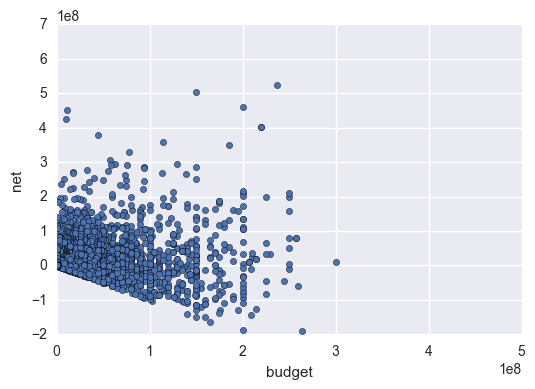

In [86]:
df2.plot(x='budget',y='net',kind='scatter', xlim=(0000000000,500000000), ylim=(-200000000,700000000))

In [81]:
df_budget_net=( df2[['net','budget']].corr())
df_budget_net

net    budget
net     1.000000 -0.951709
budget -0.951709  1.000000

###  <font color='#ff8080'> CONCLUSION: 
### 1. FROM the above graph you can clearly see that's not the case. YES, there are instances when net profit has reached    highest point for few high budget movies. But, the general trend shows that it mostly decreases with increase in budget
###  2. Even the Coorelation proves that net and budget are nit directly related  </font> 


### <font color='#3b5998'> 1.7  WITH WHICH FACTOS IS PROFIT ACTUALLY RELATED IN THE DATASET? </font>


In [87]:
corr = df2.corr()

In [88]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

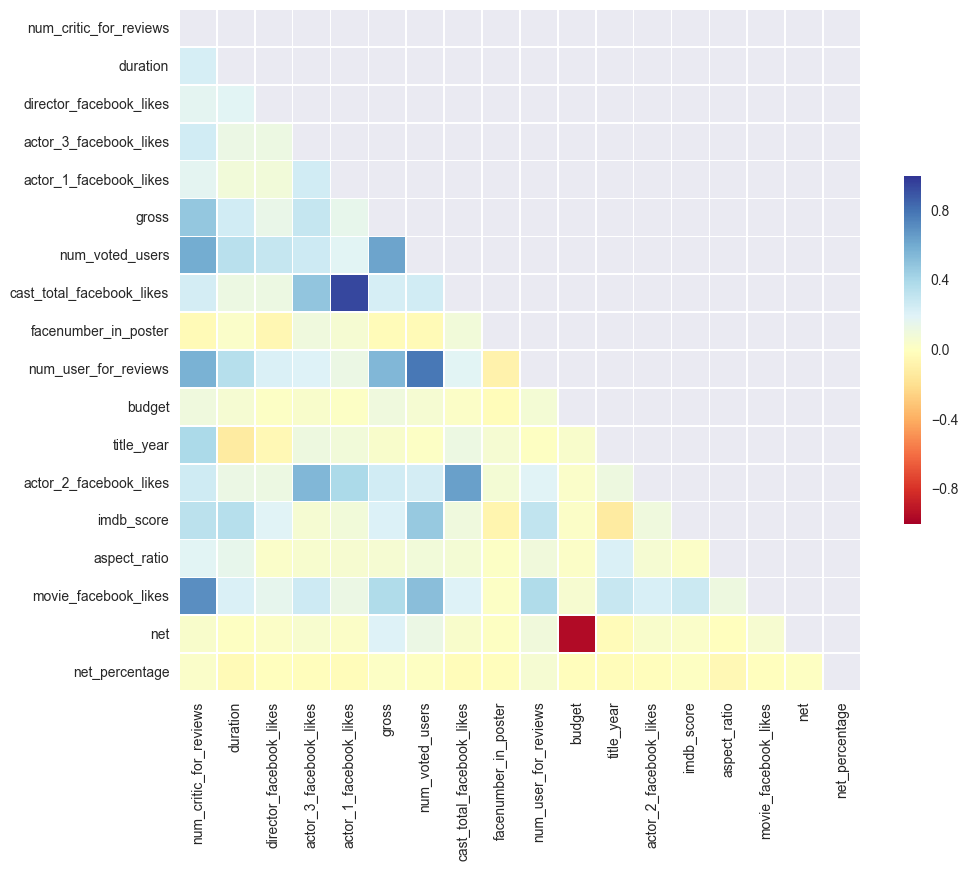

In [89]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='RdYlBu', vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## <font color='#ff8080'> Conclusion: Net and Net percentage does not have any direct relation with any of the other element </font> 


### <font color='#3b5998'> 1.8 For the year range 2000-2020 we will find out what was their gross and budget </font> 


In [90]:
df_gross_years= df1[(df1['title_year']>2000.0)&(df1['title_year']<2020.0)]

In [91]:
# df1.head()

In [92]:
df_gross_years1=df_gross_years.groupby('title_year')['movie_title'].count()

In [93]:
df_sort= df1.loc[:,['title_year','budget']]
df_sort.sort_values(by='budget', ascending=False).head()

title_year        budget
2988      2006.0  1.221550e+10
3859      2005.0  4.200000e+09
3005      2005.0  2.500000e+09
2323      1997.0  2.400000e+09
2334      2004.0  2.127520e+09

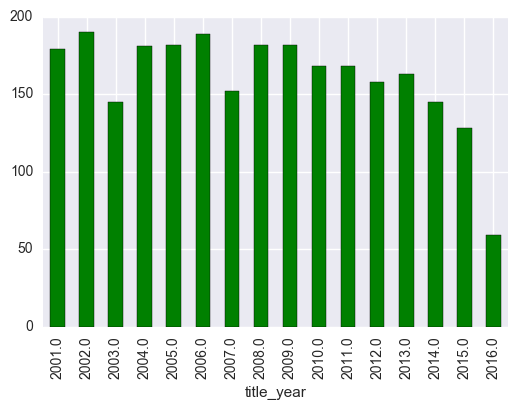

In [94]:
df_gross_years1.plot(kind='bar', color='green')

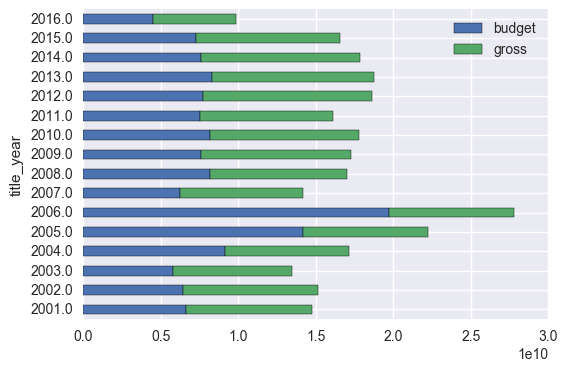

In [95]:
df_gross= df_gross_years.groupby('title_year')['budget','gross'].sum().plot.barh(stacked=True)
df_gross1= df_gross_years.groupby('title_year')['budget','gross'].sum()

##  <font color='#ff8080'> Conclusion: Stacked Bar plot shows following results:  
1. The budget of movies increased significantly from 2004 upto 2006. Highest being in 2006.
2. Number of movies released in 2006 was almost equal to 2002,2004,2005,2008,2009 but the budgetin 2006 was quite    high. Comparing the the gross 2006 had the lowest gross which indicates many high budget films didn't do well in the box office.
3. From the dataframe(df_sort) we can clearly see that the top budget films are between 2005 aqnd 2006.


</font>

##  <font color='#3b5998'>1.9 Which country has the highest number of movies?
 </font>


In [96]:
df_num_movies_country= df1.groupby(['country'])['movie_title'].count().reset_index()

In [97]:
df_num_movies_country.head()

country  movie_title
0  Afghanistan            1
1    Argentina            3
2        Aruba            1
3    Australia           39
4      Belgium            1

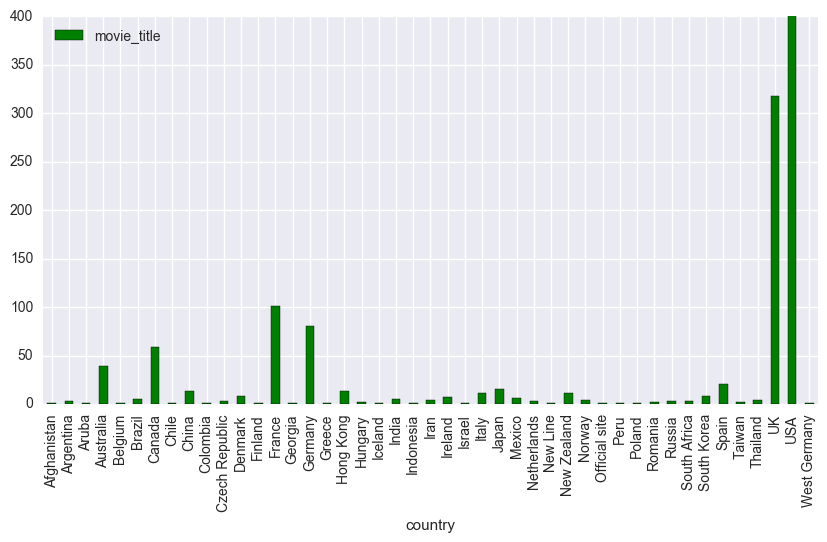

In [100]:
df_num_movies_country.plot(x='country',y ='movie_title', kind='bar', ylim=(0,400), figsize=(10,5), color='green')

## <font color='#ff8080'> USA leads with the most number of films in the dataset. The big 5 are USA, UK, Germany, France and Canada. We will now figure out which language is the most used in the database </font> 


##  <font color='#3b5998'> 1.10 Which language has the highest number of movies ? </font>


In [129]:
df_num_lan= df1.groupby(['language'])['movie_title'].count().reset_index()

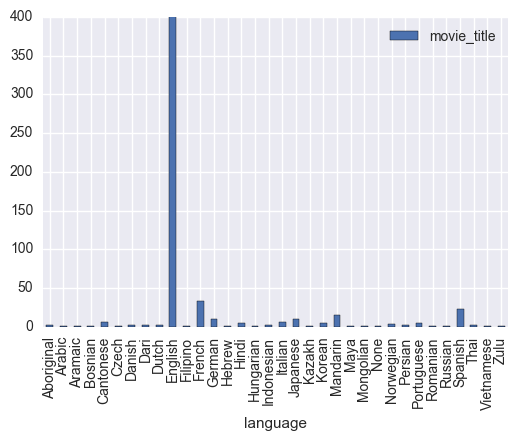

In [132]:
df_num_lan.plot(x='language',y='movie_title', kind='bar', ylim=(0,400))

##  <font color='#ff8080'> ENglish is the highest use language in the dataset followed by French, Spanish, Mandarian and Japanese </font> 
